## Introduction

Welcome to the DSN Internship Coding Challenge! This assessment will put your Natural Language Processing (NLP) and problem-solving abilities to the test. :

- Section one of the assessmnet will require you to build a text classification model.

Good luck! If you have questions about the framing of the questions, please contact **recruitment@datasciencenigeria.ai**

### How to Use and Submit this Notebook.
- Make a copy of this document and rename it **Firstname_Lastname_DSNInternshipCodingAssessment.ipynb**
- Before attempting to submit, ensure that you have ran all of the cells in your notebook and the output visible.
- Once you’ve completed all tasks, save and download a copy of the notebook as .ipynb
- Submit a link (make sure that the link is set to "Anyone on the internet with the link can view"), the downloaded copy of your final notebook via this [link](https://forms.gle/t8sFNrfAymZUrfJq7).

### What Not to Do.
- Do not share this document with any external party
- No teamwork is permitted
- After submitting a copy of your script, you are not permitted to make any changes to the online version; any discrepancy between the online and submitted copies will render your application null and void.

### Dataset

This is a news [dataset](https://drive.google.com/file/d/1NgPM7_mFCDKnuqI9SamMCrkF1mE5AgAI/view?usp=sharing) which contains 2225 examples of news articles with their respective labels. Use to the link to learn more about the dataset

## Section 1

### Task

**This is to test your knowledge on NLP**

Build and train a machine learning model with the provided dataset to classify the news category or topic. You can use any architecture or model, in this test.

**Make sure to plot the accuracy vs epochs and loss vs epochs graphs**

In [ ]:
%pip install pandas numpy matplotlib scikit-learn
%pip install nltk
%pip install gensim

Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
import nltk
nltk.download('punkt')
nltk.download("stopwords")
nltk.download("wordnet")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df = pd.read_csv("/content/bbc-text.csv")
df.head(10)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
5,politics,howard hits back at mongrel jibe michael howar...
6,politics,blair prepares to name poll date tony blair is...
7,sport,henman hopes ended in dubai third seed tim hen...
8,sport,wilkinson fit to face edinburgh england captai...
9,entertainment,last star wars not for children the sixth an...


In [ ]:
# Get the unique values in the 'category' column
unique_categories = df['category'].unique().tolist()

print("Unique categories:", unique_categories)



Unique categories: ['tech', 'business', 'sport', 'entertainment', 'politics']


## Preprocess the text data

Apply preprocessing steps such as removing punctuation, converting text to lowercase, removing stop words, and stemming or lemmatizing words to reduce noise and normalize the text.

In [ ]:
import re
import string
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

# Remove punctuation
def remove_punctuation(text):
    text = re.sub(f"[{string.punctuation}]", "", text)
    return text

# Convert text to lowercase
def convert_to_lowercase(text):
    return text.lower()

# remove stopwords
custom_stopwords = ['v', 'bn bn', 'bn']  # Add your non-English or domain-specific words here
def remove_stop_words(text):
    stop_words = set(stopwords.words("english") + custom_stopwords)
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return " ".join(filtered_tokens)


# Remove HTML tags if any
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    cleaned_text = soup.get_text(separator=" ")
    return cleaned_text

# Remove numbers
def remove_numbers(text):
    text = re.sub(r'\d+', '', text)
    return text

# Remove special characters
def remove_special_characters(text):
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Remove extra whitespace
def remove_whitespace(text):
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

# Apply all preprocessing steps
def preprocess_text(text):
    text = remove_html_tags(text)
    text = remove_numbers(text)
    text = remove_special_characters(text)
    text = remove_whitespace(text)
    return text




Apply these preprocessing steps to text data

In [ ]:
# Apply preprocessing to the 'text' column
df["text"] = df["text"].apply(preprocess_text)
df["text"] = df["text"].apply(remove_punctuation)
df["text"] = df["text"].apply(convert_to_lowercase)
df["text"] = df["text"].apply(remove_stop_words)
df.head(100)

,category,text
0,tech,tv future hands viewers home theatre systems p...
1,business,worldcom boss left books alone former worldcom...
2,sport,tigers wary farrell gamble leicester say rushe...
3,sport,yeading face newcastle fa cup premiership side...
4,entertainment,ocean twelve raids box office ocean twelve cri...
...,...,...
95,sport,dent continues adelaide progress american tayl...
96,business,oil rebounds weather effect oil prices recover...
97,sport,ireland win eclipses refereeing errors interna...
98,business,japan narrowly escapes recession japan economy...


In [ ]:
#checking_null_values
df.isna().sum()

category    0
text        0
dtype: int64

In [ ]:
df.value_counts

<bound method DataFrame.value_counts of            category                                               text
0              tech  tv future hands viewers home theatre systems p...
1          business  worldcom boss left books alone former worldcom...
2             sport  tigers wary farrell gamble leicester say rushe...
3             sport  yeading face newcastle fa cup premiership side...
4     entertainment  ocean twelve raids box office ocean twelve cri...
...             ...                                                ...
2220       business  cars pull us retail figures us retail sales fe...
2221       politics  kilroy unveils immigration policy exchatshow h...
2222  entertainment  rem announce new glasgow concert us band rem a...
2223       politics  political squabbles snowball become commonplac...
2224          sport  souness delight euro progress boss graeme soun...

[2225 rows x 2 columns]>

Distribution of Datapoints Per Category

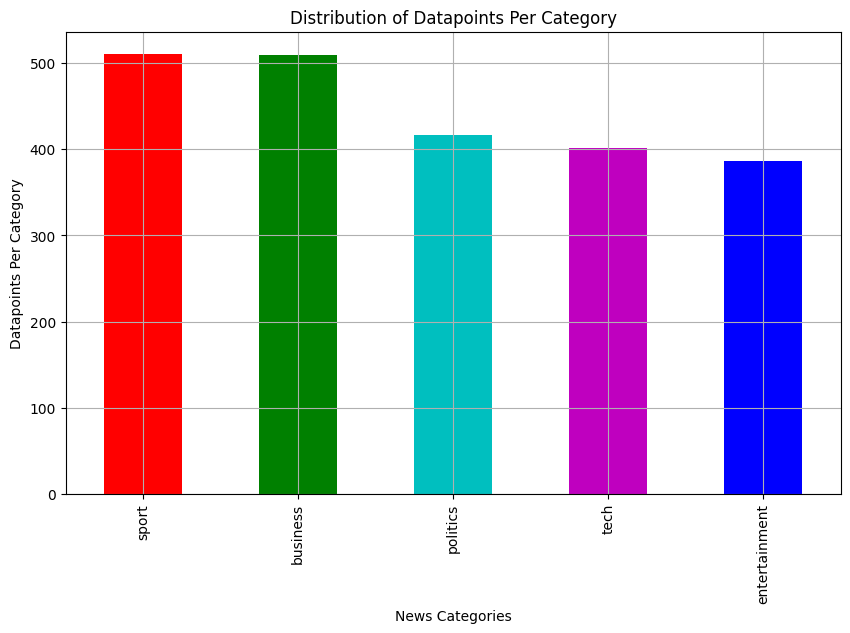

In [ ]:
news_cat = df['category'].value_counts()

plt.figure(figsize=(10,6))
my_colors = ['r','g','c','m','b']
news_cat.plot(kind='bar', color=my_colors)
plt.grid()
plt.xlabel("News Categories")
plt.ylabel("Datapoints Per Category")
plt.title("Distribution of Datapoints Per Category")
plt.show()

## Split the dataset

In [ ]:
# check the amount of word in each article
import seaborn as sns
word_count = df['text'].str.len()
print(word_count)



0       2890
1       1338
2        868
3       1739
4       1152
        ... 
2220    1211
2221     695
2222    1119
2223    2811
2224     736
Name: text, Length: 2225, dtype: int64


<Axes: xlabel='text', ylabel='Count'>

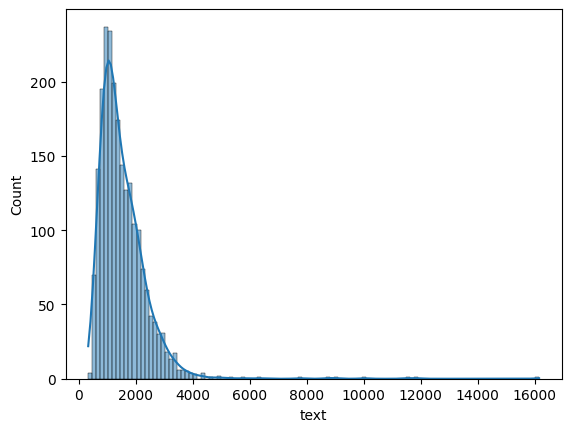

In [ ]:
sns.histplot(word_count, kde=True)



The distribution of the dataset is unimodal and slighly positively skewed but there appear to be some articles with very high word count


In [ ]:


print('median word count: ', word_count.median())
print('mean word count: ', word_count.mean())

lt1 = sum(word_count > 7500)
print('word count larger than 7500: ', lt1)

lt2 = sum(word_count > 10000)
print('word count larger than 10000: ', lt2)

median word count:  1350.0
mean word count:  1544.4085393258426
word count larger than 7500:  7
word count larger than 10000:  4


The articles with large word count may increase the frequency of certain words which may affect the weights/values of the feature vectors when calculating TF-IDF (Term Frequency-Inverse Document Frequency) so we will exclude these few articles.

In [ ]:
df = df[df['text'].str.len() <= 7500]
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2218 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2218 non-null   object
 1   text      2218 non-null   object
dtypes: object(2)
memory usage: 52.0+ KB
None


In [ ]:
tfidf = TfidfVectorizer(sublinear_tf=True, stop_words='english', ngram_range=(1, 2),
                        min_df=5, norm='l2', encoding='latin-1', lowercase=True)

train_features = tfidf.fit_transform(df['text']).toarray()
test_features = tfidf.transform(df['text']).toarray()
print(train_features.shape)

(2218, 13481)


Now we can check the most correlated terms to each categories using chi-squared test

In [ ]:
from sklearn.feature_selection import chi2

cat_id_df = pd.DataFrame(zip(unique_categories, list(range(5))), columns=['category', 'cat_id'])
cat2id = dict(cat_id_df.values)
id2cat = dict(cat_id_df[['cat_id', 'category']].values)
train_data = df.merge(cat_id_df, on='category', how='left')

true_labels = train_data.cat_id

train_data.head()
cat_id_df

for cat, cat_id in sorted(cat2id.items()):
    chi2_train_features = chi2(train_features, true_labels==cat_id)
    idx = np.argsort(chi2_train_features[0])
    train_f_names = np.array(tfidf.get_feature_names_out())[idx]
    top_f = train_f_names[-10:]
    print(cat, top_f)

business ['profits' 'market' 'economic' 'stock' 'prices' 'economy' 'oil' 'bank'
 'growth' 'shares']
entertainment ['comedy' 'award' 'festival' 'actress' 'band' 'album' 'singer' 'awards'
 'actor' 'film']
politics ['minister' 'tony blair' 'secretary' 'tories' 'tory' 'mr blair' 'party'
 'blair' 'election' 'labour']
sport ['champion' 'game' 'chelsea' 'win' 'rugby' 'season' 'injury' 'match'
 'coach' 'cup']
tech ['web' 'pc' 'mobile' 'online' 'microsoft' 'digital' 'computer'
 'technology' 'software' 'users']


Everything seems fine, we can then project the vectors to a low-dim space to visualize the categorical separation


[Text(0.5, 1.0, 't-SNE reduced features')]

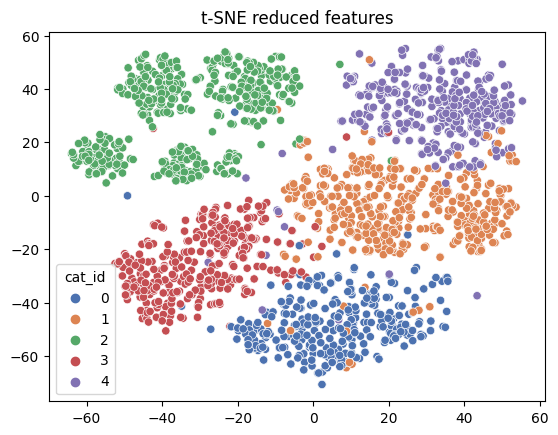

In [ ]:
from sklearn.manifold import TSNE

tsne_features = TSNE().fit_transform(train_features)
sns.scatterplot(x=tsne_features[:,0], y=tsne_features[:,1], hue=true_labels, palette='deep').set(title='t-SNE reduced features')

The articles features appear to cluster into distinct areas. For outliers in the dataset, we can expect there are articles about the intersects of different fields (e.g. entertainment business), and excluding the outliers may only lead to issues with over-fitting models. So I think we are good to go for the next steps.

In [ ]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Split the features and labels into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_features, true_labels, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Train set shape: (1774, 13481)
Test set shape: (444, 13481)


successfully split the dataset into training and testing sets using the train_test_split function. The training set (X_train and y_train) has a shape of (1774, 13481), indicating that it contains 1774 samples with 13481 features. The testing set (X_test and y_test) has a shape of (444, 13481), indicating that it contains 444 samples with the same 13481 features.

## Train a machine learning model: Using SVM

 Let's use Support Vector Machines (SVM) as the machine learning algorithm for text classification.


The SVC class from scikit-learn is used to initialize an SVM model. The fit method is then used to train the model on the training data.

Next, the predict method is used to predict the labels for the testing data based on the trained SVM model.



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the SVM model
svm_model = SVC()

# Train the SVM model on the training set
svm_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9774774774774775


SVM model achieved an accuracy of 0.977, which is quite high. This means that the model is performing well in classifying the news articles into their respective categories.



## Evaluate the model

To further analyze the performance, need to calculate other evaluation metrics such as precision, recall, and F1-score to get a more comprehensive understanding of the model's performance.

In [ ]:
from sklearn.metrics import classification_report

classification_report = classification_report(y_test, y_pred)
print(classification_report)


              precision    recall  f1-score   support

           0       1.00      0.97      0.98        89
           1       0.96      0.96      0.96        99
           2       0.98      1.00      0.99        86
           3       1.00      0.99      0.99        86
           4       0.95      0.98      0.96        84

    accuracy                           0.98       444
   macro avg       0.98      0.98      0.98       444
weighted avg       0.98      0.98      0.98       444



The classification report provides precision, recall, and F1-score for each category, along with support (the number of samples) in the test set. Here's a breakdown of the metrics:

* Precision: It measures the proportion of correctly predicted instances for a given class. Higher precision indicates fewer false positives. The model achieves high precision for all categories, ranging from 0.95 to 1.00.

* Recall: It measures the proportion of correctly predicted instances out of the total actual instances of a class. Higher recall indicates fewer false negatives. The model demonstrates high recall for all categories, ranging from 0.96 to 1.00.

* F1-score: It is the harmonic mean of precision and recall, providing a balanced measure of the model's performance. The F1-scores for all categories are high, ranging from 0.96 to 0.99.

Based on the classification report, which provides precision, recall, and F1-score for each category, the SVM model appears to perform well across all categories. The accuracy is high at 0.98, and the precision, recall, and F1-score are also high for each category.

Overall, the model exhibits excellent performance in terms of precision, recall, and F1-score, indicating accurate classification across all categories.




Additionally, visualizing the confusion matrix can provide more insights into the model's classification performance.

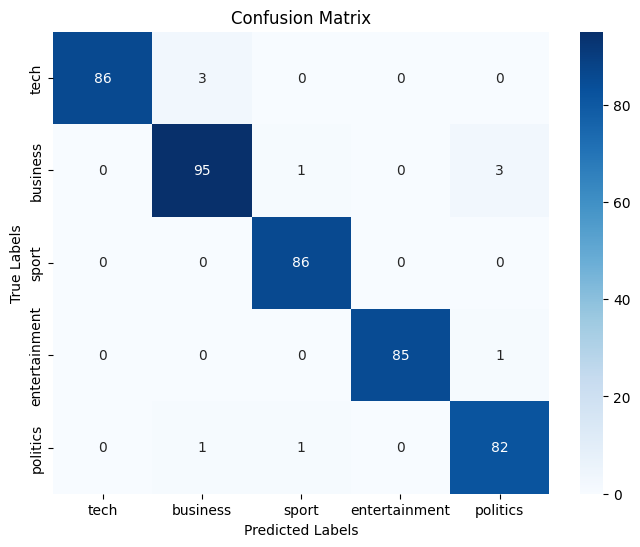

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

categories = ['tech', 'business', 'sport', 'entertainment', 'politics']

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


By considering additional evaluation metrics and exploring hyperparameter tuning, I can ensure that the model's performance is robust and reliable for classifying news articles into their respective categories.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter search space
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 10]
}

# Create the SVM classifier
svm = SVC()

# Perform grid search
grid_search = GridSearchCV(svm, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Hyperparameters:", best_params)
print("Test Accuracy:", accuracy)


Best Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Test Accuracy: 0.9842342342342343


Achieving a even higher test accuracy after hyperparameter tuning With the best hyperparameters of C = 10, gamma = 0.1, and kernel = 'rbf', the SVM model achieved a test accuracy of 0.984, indicating improved performance in classifying news articles into their respective categories.

Hyperparameter tuning helps to find the optimal configuration for the SVM model by exploring different combinations of hyperparameters. In this case, it resulted in better performance, demonstrating the importance of selecting the right hyperparameters for the given dataset and problem.

With an accuracy of 0.984, the model shows strong classification capability and can be considered reliable for categorizing news articles.

## Further exploration and improvement

### Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the SVM model
cross_val_scores = cross_val_score(svm_model, X_train, y_train, cv=5)  # cv specifies the number of folds

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())


Cross-Validation Scores: [0.97183099 0.97464789 0.98028169 0.98309859 0.98022599]
Mean Cross-Validation Score: 0.9780170287260285


These scores indicate that the SVM model performs consistently well across different folds of the training data. The mean cross-validation score of 0.978 indicates a high level of accuracy and suggests that the model is likely to generalize well to unseen data.

Cross-validation provides a more robust estimate of the model's performance by considering multiple splits of the data. In this case, the SVM model shows consistently high accuracy across different cross-validation folds, which is a positive indication of its effectiveness.

By performing cross-validation, I gained a better understanding of how the model performs on unseen data and can have more confidence in its overall performance

## Trying Different Models

While SVMs are effective for text classification, it's always worth exploring other models to find the best approach for your specific task. One popular alternative is the Naive Bayes classifier, which is known for its simplicity and efficiency.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes classifier
nb_model = MultinomialNB()

# Train the Naive Bayes classifier
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate the Naive Bayes classifier
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)


Naive Bayes Accuracy: 0.972972972972973


The Naive Bayes classifier achieved an accuracy of 0.972972972972973 on the test set. This indicates that the Naive Bayes model is also performing well in classifying the news articles into their respective categories.

Comparing the accuracy of the Naive Bayes classifier (0.972973) with the SVM model (0.977477), we can see that both models are performing at a similar high level of accuracy. This suggests that both models are effective for the task of text classification in this context.

Saving the trained models

In [ ]:
from joblib import dump

# Save the SVM model
print(dump(svm_model, 'svm_model.joblib'))

# Save the Naive Bayes model
print(dump(nb_model, 'naive_bayes_model.joblib'))


['svm_model.joblib']
['naive_bayes_model.joblib']


Load model

In [ ]:
from joblib import load

# Load the SVM model
svm_model = load('svm_model.joblib')

# Load the Naive Bayes model
nb_model = load('naive_bayes_model.joblib')
